# Практическое занятие 16

## Вариант 11

### Задание 1

In [7]:
class Config:
    TOTAL_FRAMES = 100
    REORDER_LEVEL = 30
    FRAMES_SOLD_PER_WEEK = 14

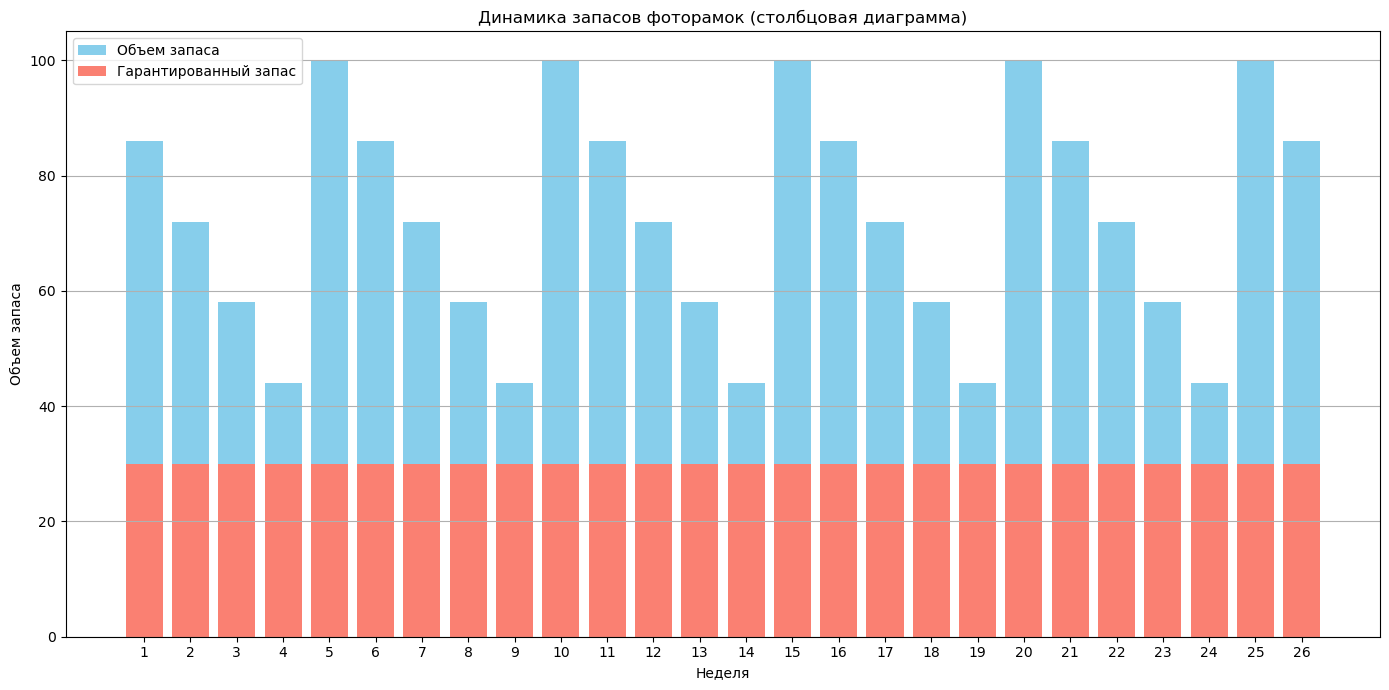

,Неделя,Объем запаса,Закупка,Необходимый объём заказа,Объем спроса,Гарантированный запас
0,1,86,Нет,14,14,30
1,2,72,Нет,28,14,30
2,3,58,Нет,42,14,30
3,4,44,Нет,56,14,30
4,5,100,Да,70,14,30
5,6,86,Нет,14,14,30
6,7,72,Нет,28,14,30
7,8,58,Нет,42,14,30
8,9,44,Нет,56,14,30
9,10,100,Да,70,14,30


In [17]:
from matplotlib import pyplot as plt
import pandas as pd

class PhotoStudio:
    def __init__(self, total_frames, reorder_level, frames_sold_per_week):
        self.total_frames = total_frames
        self.reorder_level = reorder_level
        self.frames_sold_per_week = frames_sold_per_week
        self.reorder_quantity = total_frames - reorder_level
        self.order_size = 0

    def sell_frames(self):
        self.total_frames -= self.frames_sold_per_week
        self.order_size += self.frames_sold_per_week
        return self.check_reorder()

    def check_reorder(self):
        if self.total_frames <= self.reorder_level:
            self.reorder()
            order_size = self.order_size
            self.order_size = 0
            return True, order_size
        return False, self.order_size

    def reorder(self):
        self.total_frames = 100

    def get_cycle_duration(self):
        return self.reorder_quantity / self.frames_sold_per_week

    def get_stock_level(self):
        return self.total_frames

def simulate_half_year():
    studio = PhotoStudio(Config.TOTAL_FRAMES, Config.REORDER_LEVEL, Config.FRAMES_SOLD_PER_WEEK)
    weeks = 26  # Полгода
    data = []

    for week in range(1, weeks + 1):
        reorder_flag, order_size = studio.sell_frames()
        data.append({
            "Неделя": week,
            "Объем запаса": studio.get_stock_level(),
            "Закупка": "Да" if reorder_flag else "Нет",
            "Необходимый объём заказа": order_size,
            "Объем спроса": Config.FRAMES_SOLD_PER_WEEK,
            "Гарантированный запас": Config.REORDER_LEVEL
        })

    return pd.DataFrame(data)

def visualize_data(df):
    plt.figure(figsize=(14, 7))
    # Столбцы для уровня запасов
    plt.bar(df['Неделя'], df['Объем запаса'], color='skyblue', label='Объем запаса')
    # Столбцы для гарантированного запаса
    plt.bar(df['Неделя'], df['Гарантированный запас'], color='salmon', label='Гарантированный запас')

    plt.title('Динамика запасов фоторамок')
    plt.xlabel('Неделя')
    plt.ylabel('Объем запаса')
    plt.xticks(df['Неделя'])
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Моделирование и визуализация
df = simulate_half_year()
visualize_data(df)
df



### Задание 2

In [49]:
import pandas as pd
import math

# Класс для управления запасами
class InventoryManagement:
	def __init__(self, product_data, max_budget, max_space):
		self.product_data = product_data
		self.max_budget = max_budget
		self.max_space = max_space

	def calculate_optimal_order_size(self):
		# Расчет оптимального размера заказа по формуле Уильсона
		self.product_data['Оптимальный Размер Заказа'] = self.product_data.apply(
			lambda row: math.sqrt((2 * row['Затраты на Оформление'] * row['Спрос']) / row['Затраты на Хранение']), axis=1)

	def apply_constraints(self):
		# Применение ограничений бюджета и вместимости склада
		self.product_data['Размер Заказа'] = np.floor(self.product_data['Оптимальный Размер Заказа'])

		while True:
			total_cost = sum(self.product_data['Цена'] * self.product_data['Размер Заказа'])
			total_space = sum(self.product_data['Необходимый Объем для Хранения'] * self.product_data['Размер Заказа'])

			if total_cost <= self.max_budget and total_space <= self.max_space:
				break

			# Уменьшаем размер заказа для товара с наименьшим влиянием на общие затраты
			min_cost_impact_index = self.product_data['Стоимость Товара'].idxmin()
			if self.product_data.at[min_cost_impact_index, 'Размер Заказа'] > 0:
				self.product_data.at[min_cost_impact_index, 'Размер Заказа'] -= 1

	def calculate_costs(self):
		# Расчет стоимости, затрат на хранение, затрат на оформление и общих затрат
		self.product_data['Стоимость Товара'] = self.product_data['Цена'] * self.product_data['Размер Заказа']
		self.product_data['Общие Затраты на Хранение'] = self.product_data['Затраты на Хранение'] * self.product_data['Размер Заказа']
		self.product_data['Общие Затраты на Оформление'] = self.product_data['Затраты на Оформление'] * self.product_data['Спрос'] / self.product_data['Размер Заказа']
		self.product_data['Общие Затраты'] = self.product_data['Стоимость Товара'] + self.product_data['Общие Затраты на Хранение'] + self.product_data['Общие Затраты на Оформление']

	def calculate_occupied_space(self):
		# Расчет занятой площади
		self.product_data['Занятая Площадь'] = self.product_data['Необходимый Объем для Хранения'] * self.product_data['Размер Заказа']

	def get_final_dataframe(self):
		# Формирование итогового DataFrame
		return self.product_data[['ID Продукта', 'Размер Заказа', 'Оптимальный Размер Заказа', 'Стоимость Товара', 'Общие Затраты на Хранение', 'Общие Затраты на Оформление', 'Общие Затраты', 'Занятая Площадь']]

# Исходные данные
data = {
	'ID Продукта': [1, 2, 3, 4],
	'Затраты на Хранение': [25, 65, 45, 76],
	'Необходимый Объем для Хранения': [452, 233, 566, 234],
	'Спрос': [344, 472, 345, 555],
	'Затраты на Оформление': [60, 60, 60, 60],
	'Цена': [125, 150, 190, 230]
}
df = pd.DataFrame(data)

# Создание экземпляра класса и выполнение расчетов
inventory = InventoryManagement(df, max_budget=40000, max_space=60000)
inventory.calculate_optimal_order_size()
inventory.apply_constraints()
inventory.calculate_costs()
inventory.calculate_occupied_space()

final_df = inventory.get_final_dataframe()

sums = final_df[['Стоимость Товара', 'Общие Затраты на Хранение', 'Общие Затраты на Оформление', 'Общие Затраты', 'Занятая Площадь']].sum()
sum_row = pd.DataFrame(
	[['-', '-', '-', sums['Стоимость Товара'], sums['Общие Затраты на Хранение'], sums['Общие Затраты на Оформление'], sums['Общие Затраты'], sums['Занятая Площадь']]],
	columns=['ID Продукта', 'Размер Заказа', 'Оптимальный Размер Заказа', 'Стоимость Товара', 'Общие Затраты на Хранение', 'Общие Затраты на Оформление', 'Общие Затраты', 'Занятая Площадь'],
	index=['Итого']
)
final_df = pd.concat([final_df, sum_row])

final_df

,ID Продукта,Размер Заказа,Оптимальный Размер Заказа,Стоимость Товара,Общие Затраты на Хранение,Общие Затраты на Оформление,Общие Затраты,Занятая Площадь
0,1,40.0,40.63496,5000.0,1000.0,516.000000,6516.000000,18080.0
1,2,29.0,29.519225,4350.0,1885.0,976.551724,7211.551724,6757.0
2,3,30.0,30.331502,5700.0,1350.0,690.000000,7740.000000,16980.0
3,4,29.0,29.602631,6670.0,2204.0,1148.275862,10022.275862,6786.0
Итого,-,-,-,21720.0,6439.0,3330.827586,31489.827586,48603.0


### Задание 3

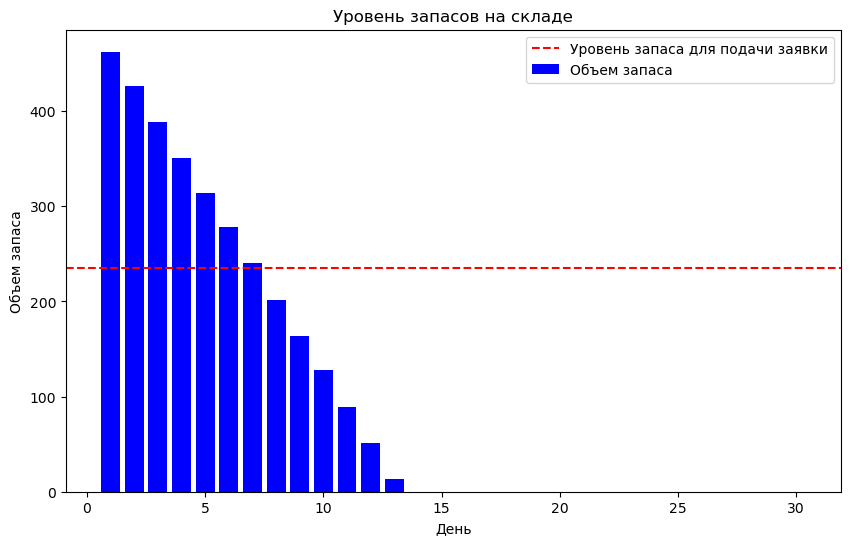

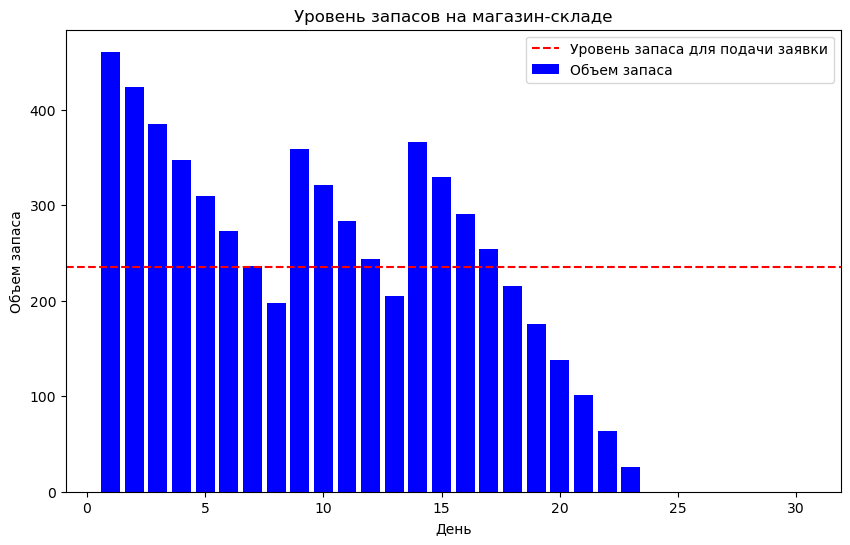

,Номер дня,Объем запаса (магазин-склад),Индикатор подачи заявки (магазин-склад),Объем спроса (магазин-склад),Объем запаса (склад),Индикатор подачи заявки (склад),Объем спроса (склад)
0,1,460.524322,0.0,39.475678,462.39234,0.0,37.60766
1,2,423.585876,0.0,36.938446,425.922706,0.0,36.469634
2,3,384.770109,0.0,38.815768,388.469871,0.0,37.452834
3,4,347.043966,0.0,37.726142,350.924605,0.0,37.545266
4,5,309.633122,0.0,37.410844,314.10741,0.0,36.817196
5,6,273.301478,0.0,36.331644,277.861064,0.0,36.246345
6,7,236.197285,0.0,37.104193,239.845622,0.0,38.015442
7,8,197.135871,0.0,39.061414,201.745437,0.0,38.100185
8,9,358.427286,0.0,38.708585,164.023517,-0.417248,37.72192
9,10,321.458413,0.0,36.968873,127.552319,-0.417248,36.471198


In [10]:
# Переопределяем классы и методы с учетом предыдущих параметров
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class InventorySystem:
	"""
    Базовый класс для системы управления запасами.
    """
	def __init__(self, initial_stock, daily_demand_mean, demand_std_dev, order_volume, reorder_level, delivery_time_mean, delivery_time_std_dev):
		"""
        Инициализация системы управления запасами.
        """
		self.initial_stock = initial_stock
		self.daily_demand_mean = daily_demand_mean
		self.demand_std_dev = demand_std_dev
		self.order_volume = order_volume
		self.reorder_level = reorder_level
		self.delivery_time_mean = delivery_time_mean
		self.delivery_time_std_dev = delivery_time_std_dev
		self.stock = initial_stock
		self.order_indicator = 0
		self.delivery_time_remaining = 0
		self.stock_history = []

	def calculate_daily_demand(self):
		"""
        Расчет ежедневного спроса.
        """
		return max(0, np.random.normal(self.daily_demand_mean, self.demand_std_dev))

	def check_reorder(self):
		"""
        Проверка необходимости заказа новой партии товаров.
        """
		if self.stock <= self.reorder_level and self.order_indicator == 0:
			self.order_indicator = np.random.normal(self.delivery_time_mean, self.delivery_time_std_dev)
			self.delivery_time_remaining = self.order_indicator

	def update_stock(self, demand):
		"""
        Обновление уровня запасов на складе.
        """
		self.stock -= demand
		if self.stock < 0:
			self.stock = 0  # Гарантируем, что уровень запасов не станет отрицательным

		if self.delivery_time_remaining > 0:
			self.delivery_time_remaining -= 1

		if self.delivery_time_remaining <= 0 and self.order_indicator > 0:
			self.stock += self.order_volume
			self.order_indicator = 0

	def simulate_day(self):
		"""
		 Симуляция одного дня работы системы.
		 """
		demand = self.calculate_daily_demand()
		self.check_reorder()
		self.update_stock(demand)
		self.stock_history.append(self.stock)
		return self.stock, self.order_indicator, demand


def plot_inventory_warehouse(stock_history, reorder_level):
	"""
    Визуализация уровня запасов на складе.
    """
	num_days = len(stock_history)  # Получение количества дней в истории запасов
	if num_days != 30:
		raise ValueError(f"Ожидалось 30 дней в истории запасов, но получено {num_days}.")

	plt.figure(figsize=(10, 6))
	plt.bar(range(1, num_days + 1), stock_history, color='blue', label='Объем запаса')
	plt.axhline(y=reorder_level, color='red', linestyle='--', label='Уровень запаса для подачи заявки')
	plt.xlabel('День')
	plt.ylabel('Объем запаса')
	plt.title('Уровень запасов на складе')
	plt.legend()
	plt.show()

def plot_inventory_store_warehouse(stock_history, reorder_level):
	"""
	Визуализация уровня запасов на магазине-складе.
	"""
	num_days = len(stock_history)  # Получение количества дней в истории запасов
	if num_days != 30:
		raise ValueError(f"Ожидалось 30 дней в истории запасов, но получено {num_days}.")

	plt.figure(figsize=(10, 6))
	plt.bar(range(1, num_days + 1), stock_history, color='blue', label='Объем запаса')
	plt.axhline(y=reorder_level, color='red', linestyle='--', label='Уровень запаса для подачи заявки')
	plt.xlabel('День')
	plt.ylabel('Объем запаса')
	plt.title('Уровень запасов на магазин-складе')
	plt.legend()
	plt.show()


class Warehouse(InventorySystem):
	"""
    Класс для моделирования системы "Склад".
    """
	pass

class StoreWarehouse(InventorySystem):
	"""
    Класс для моделирования системы "Магазин-Склад".
    """
	pass

# Инициализация параметров для моделирования
initial_stock = 500  # Начальный уровень запаса на складе
daily_demand_mean = 38  # Средний ежедневный спрос
demand_std_dev = 1  # Стандартное отклонение ежедневного спроса
order_volume = 200  # Объем партии поставок
reorder_level = 235  # Уровень запаса для подачи заявки
delivery_time_mean = 2  # Среднее время поставки
delivery_time_std_dev = 2  # Стандартное отклонение времени поставки

# Создание экземпляров классов для каждой системы
warehouse = Warehouse(initial_stock, daily_demand_mean, demand_std_dev, order_volume, reorder_level, delivery_time_mean, delivery_time_std_dev)
store_warehouse = StoreWarehouse(initial_stock, daily_demand_mean, demand_std_dev, order_volume, reorder_level, delivery_time_mean, delivery_time_std_dev)

columns = ['Номер дня', 'Объем запаса (магазин-склад)', 'Индикатор подачи заявки (магазин-склад)', 'Объем спроса (магазин-склад)', 'Объем запаса (склад)', 'Индикатор подачи заявки (склад)', 'Объем спроса (склад)']
# DataFrame для записи результатов моделирования
simulation_results = pd.DataFrame(columns=columns)

rows = []

# Завершение моделирования работы систем на протяжении 30 дней
for day in range(1, 31):
	warehouse_stock, warehouse_order_indicator, warehouse_demand = warehouse.simulate_day()
	store_warehouse_stock, store_warehouse_order_indicator, store_warehouse_demand = store_warehouse.simulate_day()

	rows.append({
		'Номер дня': day,
		'Объем запаса (магазин-склад)': store_warehouse_stock,
		'Индикатор подачи заявки (магазин-склад)': store_warehouse_order_indicator,
		'Объем спроса (магазин-склад)': store_warehouse_demand,
		'Объем запаса (склад)': warehouse_stock,
		'Индикатор подачи заявки (склад)': warehouse_order_indicator,
		'Объем спроса (склад)': warehouse_demand
	})

simulation_results = pd.concat([simulation_results, pd.DataFrame(rows)], ignore_index=True)

plot_inventory_warehouse(warehouse.stock_history, reorder_level)
plot_inventory_store_warehouse(store_warehouse.stock_history, reorder_level)
# Вывод результатов моделирования
simulation_results # Показываем первые пять строк таблицы для примера